In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
df = pd.read_csv('/content/Sales Dashboard.csv')

In [10]:
df.head()

,ID,Martial Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Age Brackets,Purchased Bike
0,12496,Married,Female,"$40,000",1,Bachelors,Skilled Manual,Yes,0,0-1 Miles,Europe,42,Middle Age,No
1,24107,Married,Male,"$30,000",3,Partial College,Clerical,Yes,1,0-1 Miles,Europe,43,Middle Age,No
2,14177,Married,Male,"$80,000",5,Partial College,Professional,No,2,2-5 Miles,Europe,60,Old,No
3,24381,Single,Male,"$70,000",0,Bachelors,Professional,Yes,1,5-10 Miles,Pacific,41,Middle Age,Yes
4,25597,Single,Male,"$30,000",0,Bachelors,Clerical,No,0,0-1 Miles,Europe,36,Middle Age,Yes


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                1000 non-null   int64 
 1   Martial Status    1000 non-null   object
 2   Gender            1000 non-null   object
 3   Income            1000 non-null   object
 4   Children          1000 non-null   int64 
 5   Education         1000 non-null   object
 6   Occupation        1000 non-null   object
 7   Home Owner        1000 non-null   object
 8   Cars              1000 non-null   int64 
 9   Commute Distance  1000 non-null   object
 10  Region            1000 non-null   object
 11  Age               1000 non-null   int64 
 12  Age Brackets      1000 non-null   object
 13  Purchased Bike    1000 non-null   object
dtypes: int64(4), object(10)
memory usage: 109.5+ KB


In [16]:
df.shape

(1000, 14)

In [20]:
df.isnull().sum()

ID                  0
Martial Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                0
Commute Distance    0
Region              0
Age                 0
Age Brackets        0
Purchased Bike      0
dtype: int64

In [21]:
df = df.dropna(how = 'any')

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [40]:
y = df['ID']
X_train , y_train , X_test , y_test = train_test_split(X , y , test_size = 0.2, random_state = 3)

In [41]:
print(X.shape , X_train.shape , y_train.shape)

(1000, 14) (800, 14) (200, 14)


In [42]:
numeric_df = df.select_dtypes(include='number')
print(numeric_df.std())

ID          5347.333948
Children       1.628572
Cars           1.125123
Age           11.364488
dtype: float64


In [53]:
print(df.columns)

Index(['ID', 'Martial Status', 'Gender', 'Income', 'Children', 'Education',
       'Occupation', 'Home Owner', 'Cars', 'Commute Distance', 'Region', 'Age',
       'Age Brackets', 'Purchased Bike'],
      dtype='object')


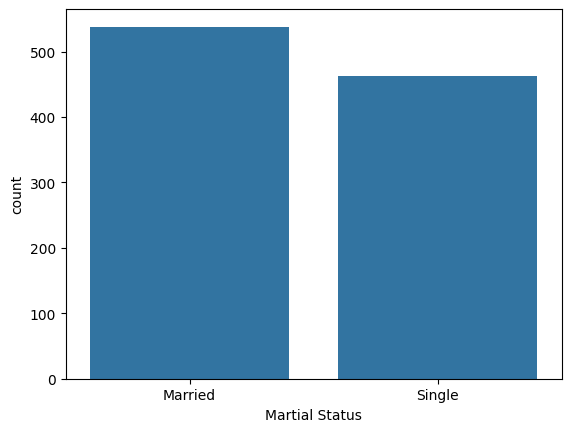

In [54]:
sns.countplot(x = "Martial Status", data=df)
plt.show()

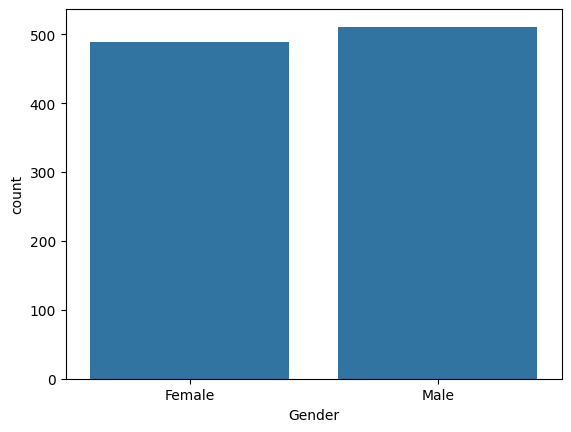

In [55]:
sns.countplot(x = "Gender", data=df)
plt.show()

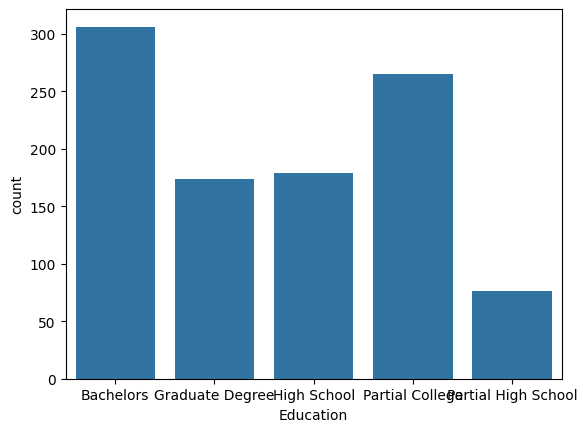

In [56]:
sns.countplot(x = "Education", data=df)
plt.show()

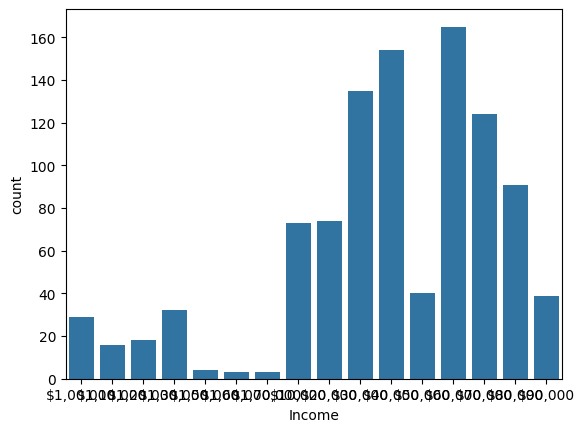

In [57]:
sns.countplot(x = "Income", data=df)
plt.show()

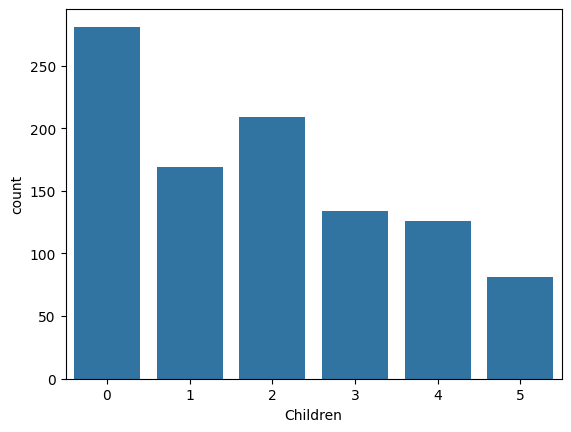

In [59]:
sns.countplot(x = "Children", data=df)
plt.show()

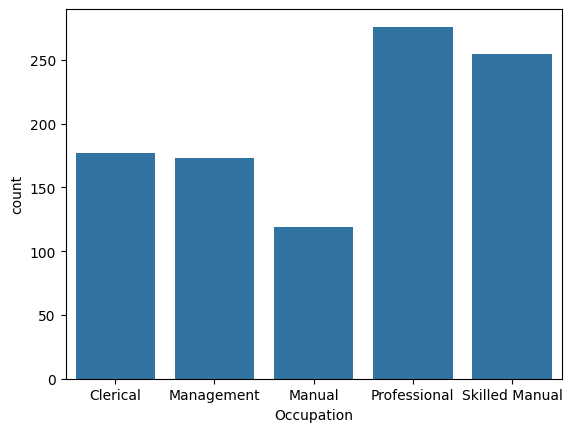

In [60]:
sns.countplot(x = "Occupation", data=df)
plt.show()

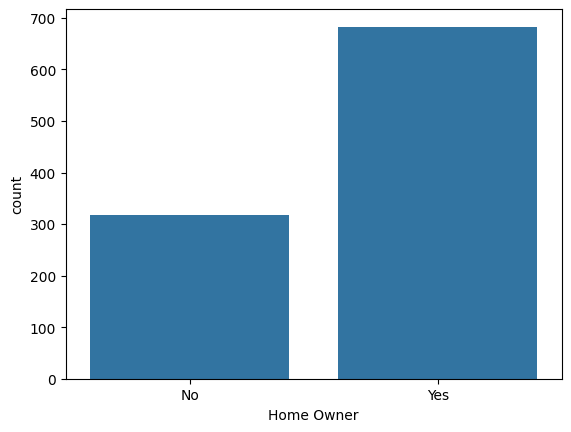

In [61]:
sns.countplot(x = "Home Owner", data=df)
plt.show()

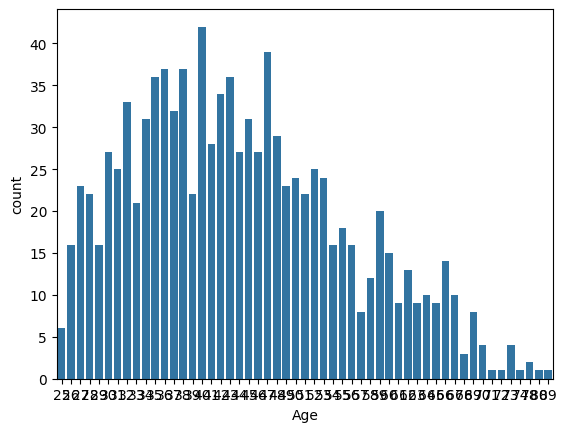

In [62]:
sns.countplot(x = "Age", data=df)
plt.show()

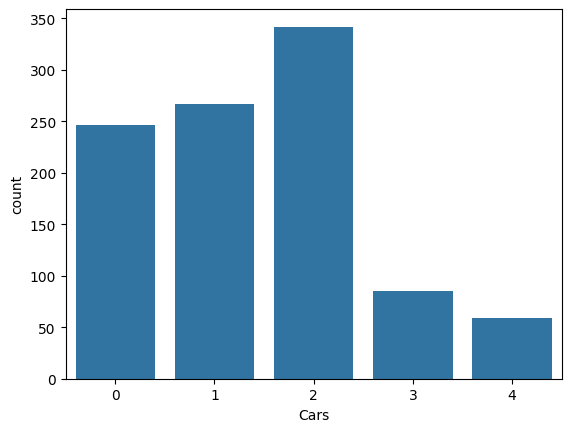

In [64]:
sns.countplot(x = "Cars", data=df)
plt.show()

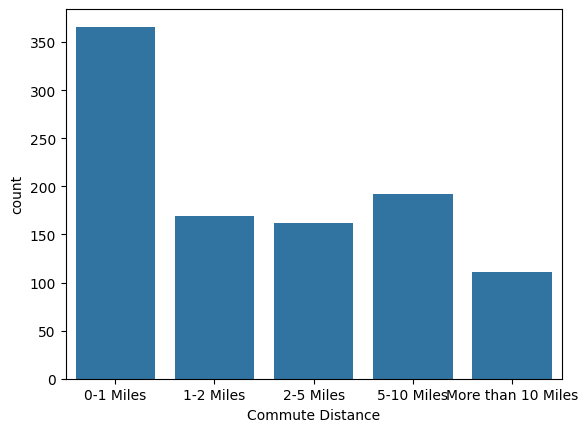

In [65]:
sns.countplot(x = "Commute Distance", data=df)
plt.show()

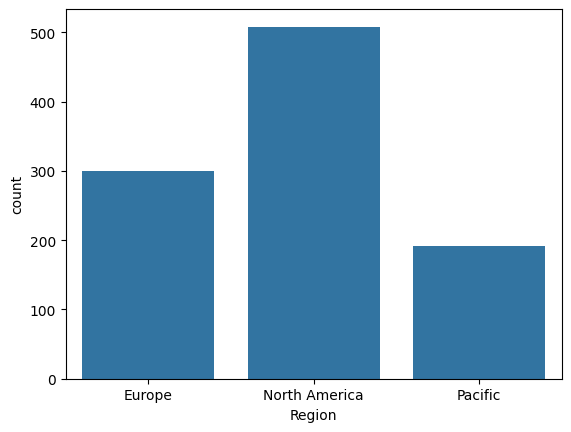

In [66]:
sns.countplot(x = "Region", data=df)
plt.show()

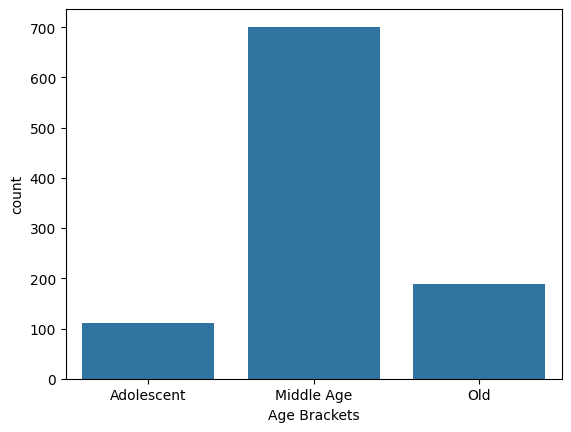

In [68]:
sns.countplot(x = "Age Brackets", data=df)
plt.show()

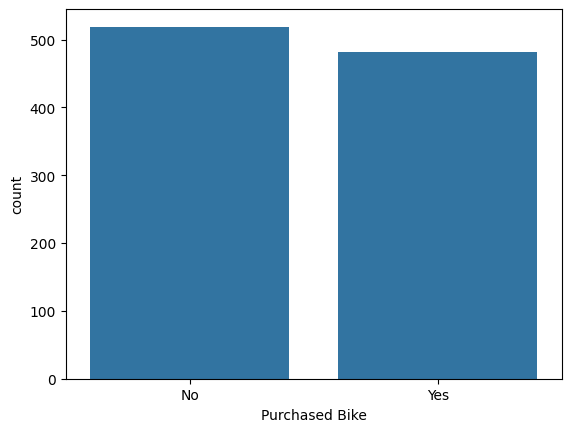

In [69]:
sns.countplot(x = "Purchased Bike", data=df)
plt.show()

In [77]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

# Iterate over columns, excluding 'Purchased Bike'
for col in df.columns:
  if df[col].dtype == 'object' and col != 'Purchased Bike': # Exclude 'Purchased Bike' from encoding
    df[col] = le.fit_transform(df[col])

X = df.drop(labels=['Purchased Bike'],axis=1) # Now this should work
Y = df['Purchased Bike']

In [80]:
!pip install seaborn scikit-learn xgboost

Logistic Regression
Accuracy: 0.59


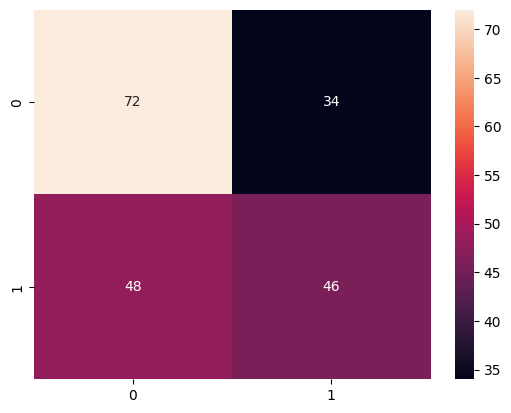

Random Forest
Accuracy: 0.765


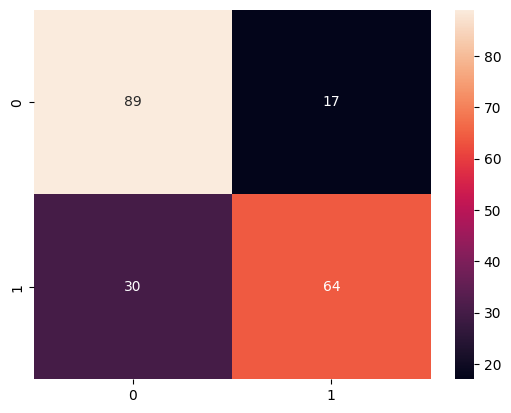

XGBoost
Accuracy: 0.73


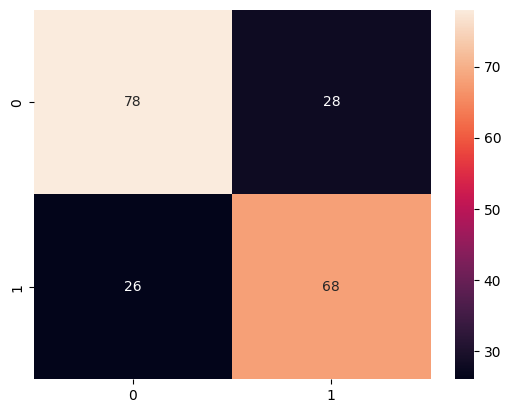

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split # Import for splitting data
import numpy as np

# Assuming 'X' and 'Y' are your features and target variable respectively
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) # Split data into training and testing sets

models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'XGBoost': XGBClassifier()
}

for name, model in models.items():
    model.fit(X_train, Y_train) # Train the model on training data
    preds = model.predict(X_test)
    print(name)
    print('Accuracy:', accuracy_score(Y_test,preds))
    sns.heatmap(confusion_matrix(Y_test,preds), annot=True)
    plt.show()